# Project 4

- Attrition 데이터
- 여러 알고리즘으로 모델 만들고 성능 예측 -> 튜닝

In [1]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# data 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/Attrition_simple2.csv'
data = pd.read_csv(path)

In [3]:
# 데이터 확인
data.head()

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


In [4]:
# 기초통계량 확인
data.describe()

,Attrition,Age,DistanceFromHome,EmployeeNumber,JobSatisfaction,MonthlyIncome,PercentSalaryHike,TotalWorkingYears
count,1196.000000,1196.00000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000
mean,0.163043,36.94398,9.258361,1035.629599,2.716555,6520.104515,15.251672,11.330268
std,0.369560,9.09270,8.166016,604.340130,1.110962,4665.902253,3.625946,7.823821
min,0.000000,18.00000,1.000000,1.000000,1.000000,1009.000000,11.000000,0.000000
25%,0.000000,30.00000,2.000000,507.750000,2.000000,2928.250000,12.000000,6.000000
50%,0.000000,36.00000,7.000000,1028.000000,3.000000,4973.500000,14.000000,10.000000
75%,0.000000,43.00000,14.000000,1581.250000,4.000000,8420.500000,18.000000,15.000000
max,1.000000,60.00000,29.000000,2068.000000,4.000000,19999.000000,25.000000,40.000000


In [5]:
# EmployeeNumber 변수 제거
drop_cols = ['EmployeeNumber']
data.drop(drop_cols, axis=1, inplace=True)
data.head()

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,Male,3,Married,11691,No,11,14
1,0,35,18,Male,4,Single,9362,No,11,10
2,0,42,6,Male,1,Married,13348,No,13,18
3,0,46,2,Female,1,Married,17048,No,23,28
4,1,22,4,Male,3,Single,3894,No,16,4


In [6]:
# x, y 분리
target = 'Attrition'

x = data.drop(target, axis=1)
y = data.loc[:, target]

In [7]:
# 가변수화 : Gender, MaritalStatus, OverTime
dumm_cols = ['Gender', 'MaritalStatus', 'OverTime']
x = pd.get_dummies(data=x, columns=dumm_cols, drop_first=True)   
x.head()

,Age,DistanceFromHome,JobSatisfaction,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,33,7,3,11691,11,14,1,1,0,0
1,35,18,4,9362,11,10,1,0,1,0
2,42,6,1,13348,13,18,1,1,0,0
3,46,2,1,17048,23,28,0,1,0,0
4,22,4,3,3894,16,4,1,0,1,0


In [8]:
# train, test 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [9]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [12]:
# 필요 함수 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [15]:
# 성능 예측 기록 변수
result_cv = {}

In [16]:
# KNN
model = KNeighborsClassifier(n_neighbors=5)
cv_score = cross_val_score(model, x_train, y_train)

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result_cv['KNN'] = cv_score.mean()

[0.80952381 0.82738095 0.83832335 0.79640719 0.80838323]
평균: 0.8160037068719703
표준편차: 0.014911020489153772


In [18]:
# Decision Tree
model = DecisionTreeClassifier(max_depth=5, random_state=1)
cv_score = cross_val_score(model, x_train, y_train)

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result_cv['Decision Tree'] = cv_score.mean()
result_cv

[0.8452381  0.8452381  0.82035928 0.83233533 0.83832335]
평균: 0.8362988309096092
표준편차: 0.009313411473989616


{'KNN': 0.8160037068719703, 'Decision Tree': 0.8362988309096092}

In [21]:
# Logistic Regression
model = LogisticRegression()
cv_score = cross_val_score(model, x_train, y_train)

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result_cv['Logistic Regression'] = cv_score.mean()
result_cv

[0.83928571 0.82142857 0.84431138 0.83832335 0.86227545]
평균: 0.8411248930710007
표준편차: 0.013089507185359603


{'KNN': 0.8160037068719703,
 'Decision Tree': 0.8362988309096092,
 'Logistic Regression': 0.8411248930710007}

In [22]:
# Random Forest
model = RandomForestClassifier(max_depth=5, random_state=1)
cv_score = cross_val_score(model, x_train, y_train)

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result_cv['Random Forest'] = cv_score.mean()
result_cv

[0.83333333 0.85119048 0.84431138 0.86227545 0.86227545]
평균: 0.8506772169945822
표준편차: 0.011051114217069832


{'KNN': 0.8160037068719703,
 'Decision Tree': 0.8362988309096092,
 'Logistic Regression': 0.8411248930710007,
 'Random Forest': 0.8506772169945822}

In [24]:
# XGBoost
model = XGBClassifier(max_depth=5, random_state=1)
cv_score = cross_val_score(model, x_train, y_train)

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result_cv['XGBoost'] = cv_score.mean()
result_cv

[0.82738095 0.85119048 0.80838323 0.85628743 0.82634731]
평균: 0.8339178785286568
표준편차: 0.01761137315597965


{'KNN': 0.8160037068719703,
 'Decision Tree': 0.8362988309096092,
 'Logistic Regression': 0.8411248930710007,
 'Random Forest': 0.8506772169945822,
 'XGBoost': 0.8339178785286568}

In [25]:
# LightGBM
model = LGBMClassifier(max_depth=5, random_state=1)
cv_score = cross_val_score(model, x_train, y_train)

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result_cv['LightGBM'] = cv_score.mean()
result_cv

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 109, number of negative: 560
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 362
[LightGBM] [Info] Number of data points in the train set: 669, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.162930 -> initscore=-1.636589
[LightGBM] [Info] Start training from score -1.636589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

{'KNN': 0.8160037068719703,
 'Decision Tree': 0.8362988309096092,
 'Logistic Regression': 0.8411248930710007,
 'Random Forest': 0.8506772169945822,
 'XGBoost': 0.8339178785286568,
 'LightGBM': 0.8446749358426004}

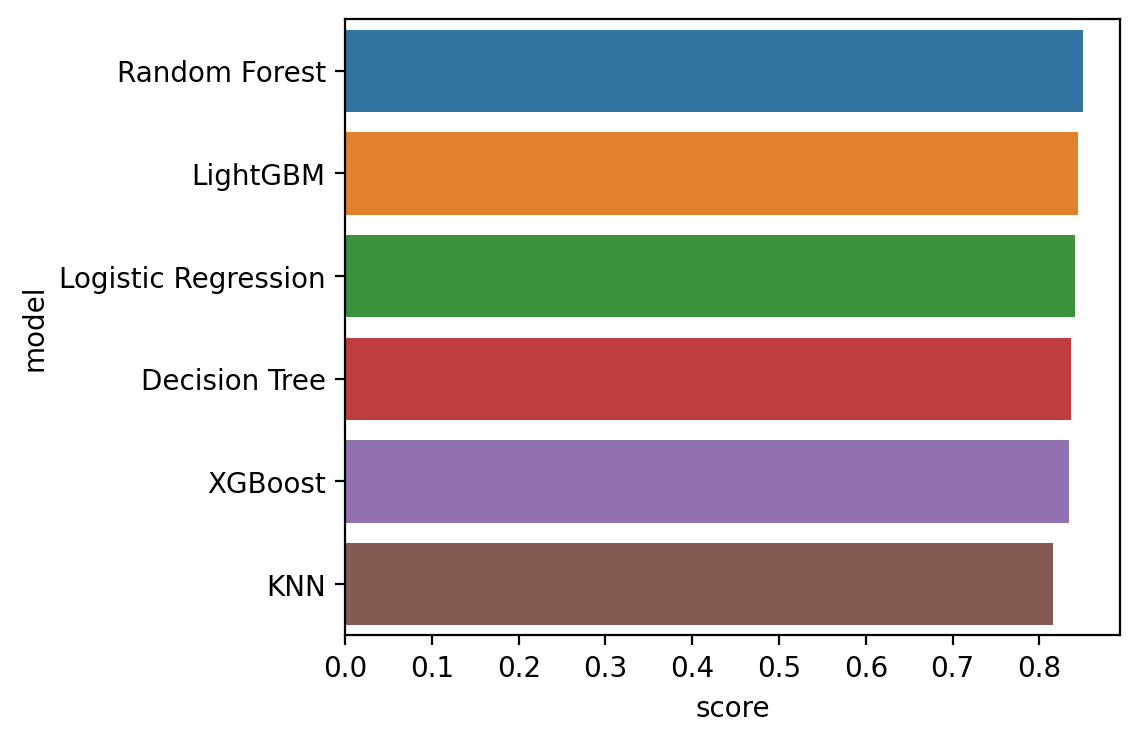

In [26]:
perf_dic = {'model': result_cv.keys(), 'score': result_cv.values()}
df = pd.DataFrame(perf_dic)
df.sort_values(by='score', ascending=False, inplace=True)

plt.figure(figsize=(5, 4))
sns.barplot(x=df['score'], y=df['model'])
plt.show()

In [33]:
# Random Forest 튜닝
param = {'max_depth': range(1, 31)}
model_dt = RandomForestClassifier(random_state=1)

model = GridSearchCV(model_dt,
                     param,
                     cv=5,
                     scoring='accuracy')

In [34]:
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': range(1, 31)}, scoring='accuracy')

In [35]:
# 결과 확인
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print(model.best_params_)
print('-' * 80)
print(model.best_score_)
print('=' * 80)

[0.83751782 0.84230111 0.84947248 0.84947961 0.85067722 0.8542629
 0.85068435 0.85185344 0.84947961 0.8494511  0.85185344 0.85067009
 0.8506487  0.85783433 0.85424865 0.85067009 0.85067009 0.84947248
 0.85066296 0.85066296 0.85066296 0.85066296 0.85066296 0.85066296
 0.85066296 0.85066296 0.85066296 0.85066296 0.85066296 0.85066296]
--------------------------------------------------------------------------------
{'max_depth': 14}
--------------------------------------------------------------------------------
0.8578343313373253


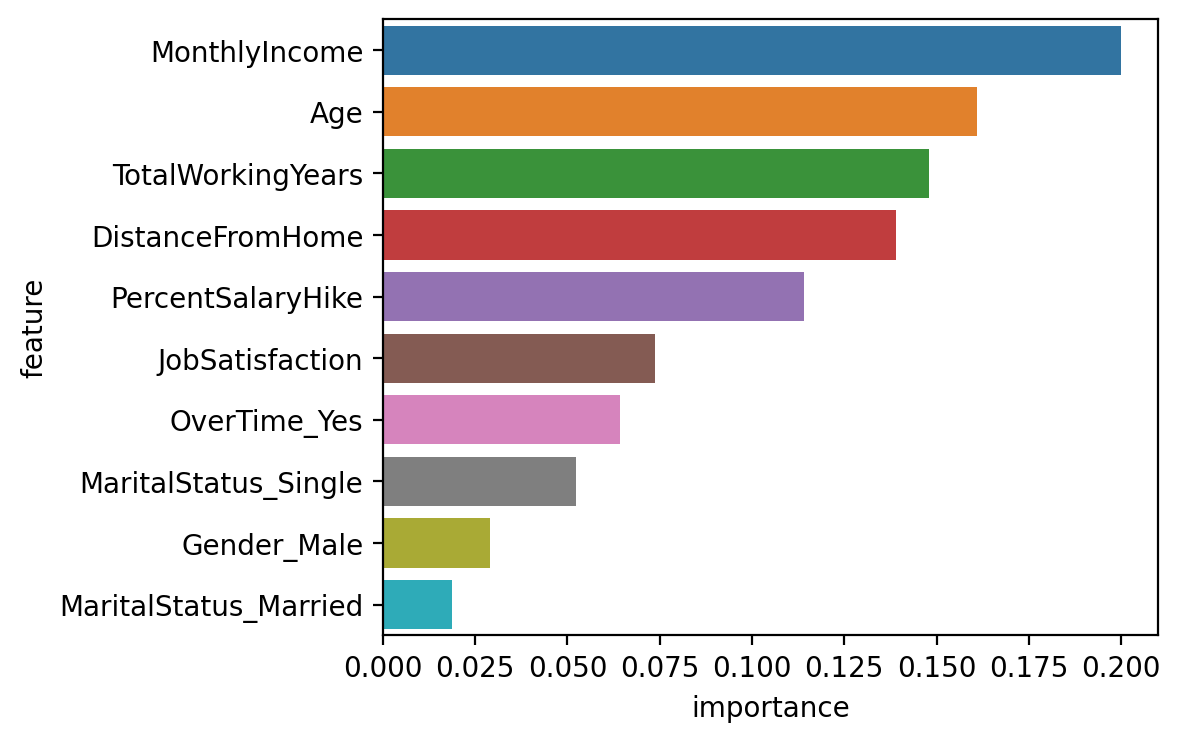

In [39]:
# 변수 중요도 시각화
feature_dic = {'feature': list(x), 'importance': model.best_estimator_.feature_importances_}
df = pd.DataFrame(feature_dic)
df.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(5, 4))
sns.barplot(x='importance', y='feature', data=df)
plt.show()

In [38]:
# 성능 평가
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       300
           1       0.52      0.27      0.36        59

    accuracy                           0.84       359
   macro avg       0.69      0.61      0.63       359
weighted avg       0.81      0.84      0.82       359

